In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

## 平稳时间序列之ARMA建模

### 1. 模型介绍

ARMA模型是时间序列分析的基本模型，于1970年由美国统计学家Box和英国统计学家Jenkins共同提出，是用来估计平稳的不规则波动或时间序列季节性变动的最常见模型。后续在ARMA模型的基础上引入差分得到ARIMA模型，为了纪念两人在时间序列分析上的突出贡献，ARIMA模型也被称为Box-Jenkins模型。

（1）AR 模型研究第t期的序列值受t-1, t-2, …期序列值以及当期随机干扰值的影响；AR模型反应记忆特征和记忆衰减情况；

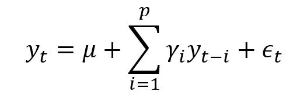

（2）MA模型研究序列在t时刻的值与t-1, t-2, … 时刻随机干扰值的相关关系；MA模型考察外部冲击对变量的影响情况和外部冲击的记忆期限。

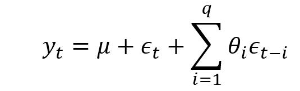

（3）ARMA模型是将自回归模型与移动平均模型相结合。在这个公式中，p与q分别为自回归模型与移动平均模型的阶数，是需要人为定义的。γi与θi分别是两个模型的相关系数，是需要求解的。

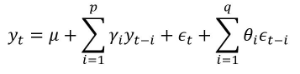

对于平稳非随机的时间序列，ARMA建模主要包含三个步骤：模型识别、参数估计和模型检验。

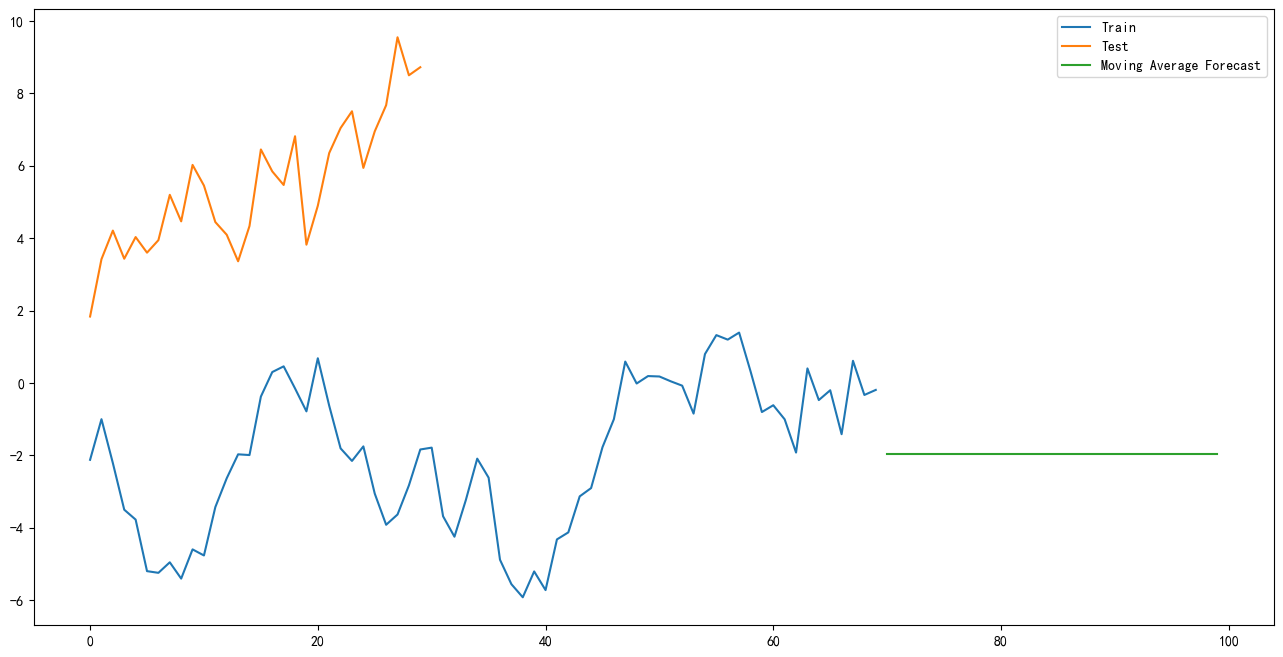

Root Mean Square Error: 7.625752150202531


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# 假设 ts 是时间序列数据
ts = np.random.randn(100).cumsum()  # 生成一些示例数据

# 使用 ARIMA 进行模型拟合（对于纯 MA 模型）
ma_model = ARIMA(ts, order=(0, 0, 1))
ma_model_fit = ma_model.fit()

# 示例时间序列
train = ts[:70]
test = ts[70:]

# 移动平均预测，扩展为测试数据长度的常数数组
moving_avg_forecast = np.full(shape=len(test), fill_value=np.mean(train))

# 绘制图形
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(range(len(train), len(train) + len(test)), moving_avg_forecast, label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# 计算均方根误差
rms = sqrt(mean_squared_error(test, moving_avg_forecast))
print('Root Mean Square Error:', rms)

### 2. 模型识别

模型识别问题是指选择合适的ARMA(p, q)模型，也称作模型定阶过程，估计自相关阶数p和移动平均阶数q。模型识别或模型定阶的主要方法有两种：一种是利用自相关系数和偏自相关系数，一种是最优信息准则

- 利用自相关系数和偏自相关系数

| 模型         | AR(p) | MA(q) | ARMA(p,q) |
| ---------- | ----- | ----- | --------- |
| ACF自相关系数   | 拖尾    | q阶截尾  | 拖尾        |
| PACF偏自相关系数 | P阶截尾  | 拖尾    | 拖尾        |

**截尾：** 在最初d阶时明显大于2倍的标准差范围，而后面几乎95.5%以上的都落在2倍标准差范围之内，并且由非零值衰减为小值波动的过程非常突然，可认为d阶截尾。

**拖尾：** 有超过5%的值落入2倍标准差范围之外，或者显著衰减为小值波动的过程比较缓慢，则拖尾。另一方面，如果值帅见到2倍标准差范围内呈现“伪正弦波动”或其他有明显规律的波动是，也认为是拖尾现象。

如图所示，自相关图里自相关系数没有快速的减为0（一般认为自相关系数低于2倍标准差即图中蓝色虚线一下时即为0），而是呈现出拖尾的特征，故判断序列为非平稳序列。

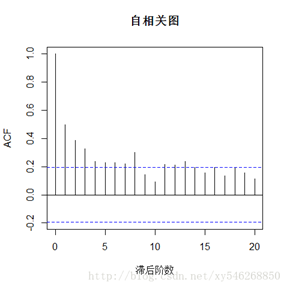

经验上，寻找模型的滞后阶数时，从1开始到样本大小的1/4比较合理。

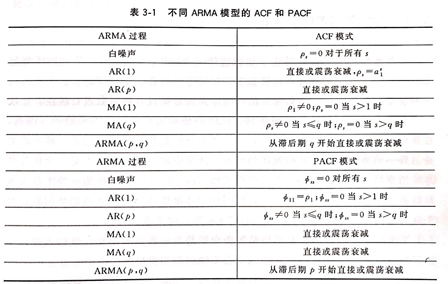

```python
方法一
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
方法二
from statsmodels.tsa.stattools import acf, pacf
方法三
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
```

In [6]:
data = np.random.normal(loc=0, scale=1, size=100)

方法一：使用 plot_acf 和 plot_pacf 从 statsmodels.graphics.tsaplots

这是最常用的方法之一，它提供了一个直接的方式来生成ACF和PACF图表，非常方便且易于使用，适合大多数常规用途。

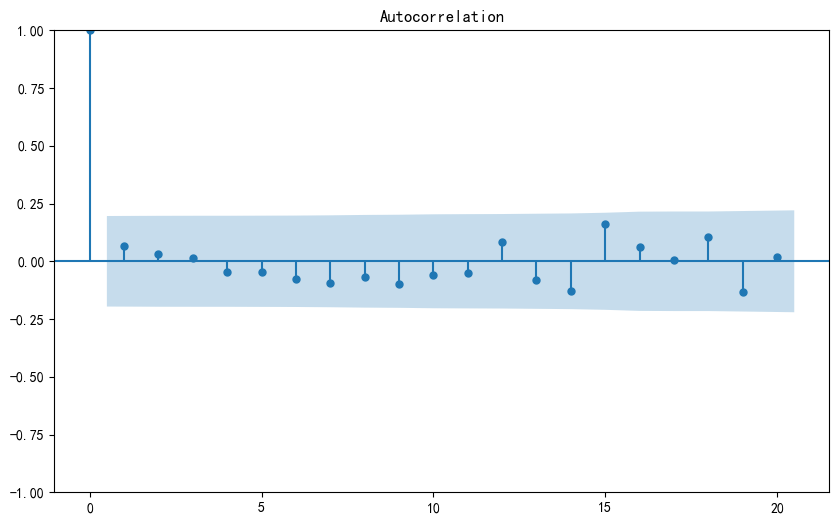

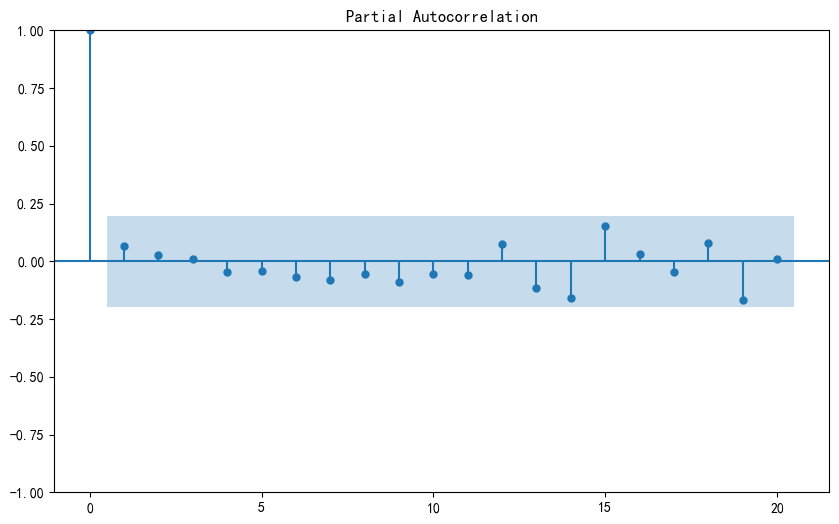

In [7]:
## 1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# 假设 data 是你的时间序列数据
# 绘制ACF图
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(data, ax=ax)
plt.show()

# 绘制PACF图
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(data, ax=ax)
plt.show()


方法二：使用 acf 和 pacf 从 statsmodels.tsa.stattools

这种方法更灵活，它不直接生成图形，而是返回ACF和PACF的数值。这对于进一步的自定义处理或当你需要自相关系数和偏自相关系数的数值时非常有用。

In [8]:
## 2
from statsmodels.tsa.stattools import acf, pacf

# 计算ACF和PACF值
acf_values = acf(data)
pacf_values = pacf(data)

# 你可以自定义使用这些值
print("ACF Values:", acf_values)
print("PACF Values:", pacf_values)


ACF Values: [ 1.          0.06487353  0.03327546  0.01460145 -0.04446786 -0.04650879
 -0.07470718 -0.09339409 -0.06757926 -0.09911075 -0.05908348 -0.0526954
  0.08372769 -0.08226478 -0.1280541   0.16121833  0.06169959  0.00532431
  0.10659705 -0.13217955  0.01887185]
PACF Values: [ 1.          0.06552882  0.02978844  0.01099927 -0.04924214 -0.04405332
 -0.07147442 -0.08824864 -0.06040052 -0.10131464 -0.06124911 -0.06644294
  0.08673939 -0.13542741 -0.18678388  0.18054061  0.03861427 -0.0577927
  0.09855325 -0.21359251  0.01293321]


方法三：使用 statsmodels.tsa.api 模块

这是一个较老的方法，但它仍然有效。它通过 smt（即 statsmodels.tsa.api）提供了一种便捷的方式来访问各种时间序列分析功能，包括ACF和PACF图的绘制。这个方法提供了一种结构化的方式来访问统计模型，对于编写模块化代码特别有用。

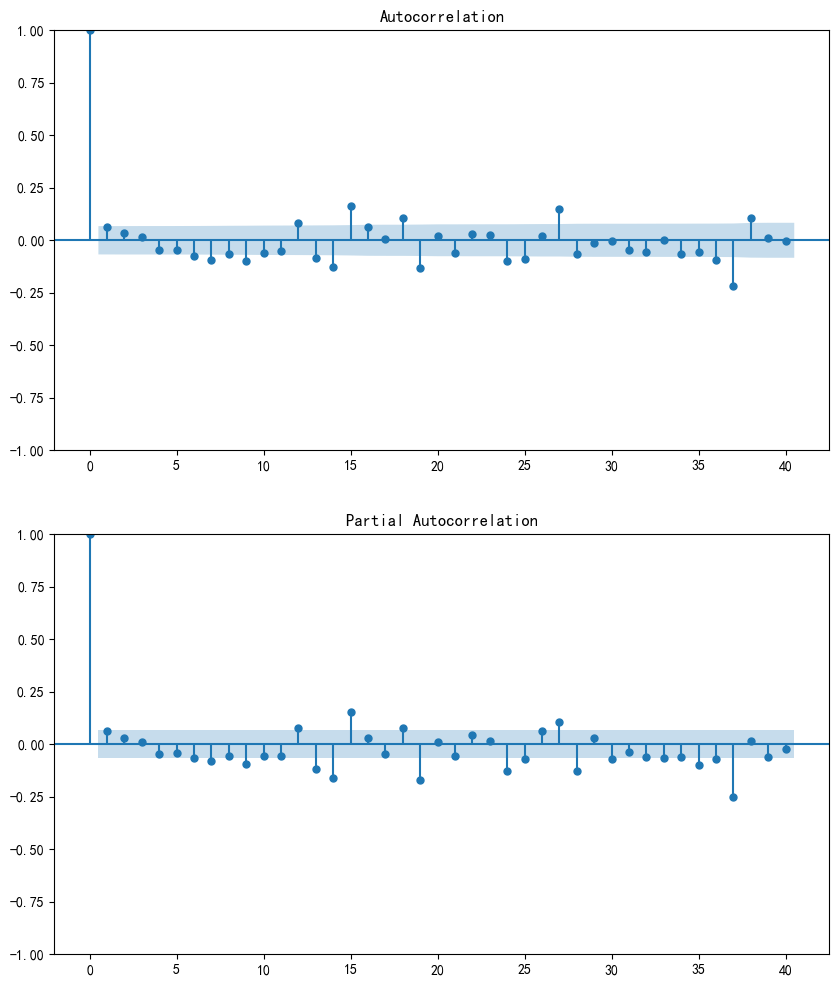

In [9]:
## 3
import statsmodels.tsa.api as smt

# 假设 data 是你的时间序列数据
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
smt.graphics.plot_acf(data, lags=40, ax=ax[0], alpha=0.5)
smt.graphics.plot_pacf(data, lags=40, ax=ax[1], alpha=0.5)
plt.show()


- 最优信息准则

根据最简约原则，常见的做法是实现选择多组(p, q)组合，通过参数估计建立多个ARMA模型，同时经过模型检验确定机组都能通过检验的(p, q)组合，然后根据AIC、BIC、HQIC等信息准则确定一组最好的(p, q)值。信息准则值越小，模型越好。
```python
AIC=-2ln(模型的极大似然函数值)+2(模型中未知参数的个数)，前者刻画了一个随机事件的信息量以及模型的拟合效果，后者兼顾了未知参数的个数。
BIC= 2ln(模型的极大似然函数值)+ln(模型中未知参数的个数)
```

补充1：信息准则：统计上来说，如果一个事件的发生给人们带来了信息，那么应该认为该事件是一个随机事件；显然，一个为人们所完全预料的事件，不会给人们带来信息；小概率的事件能带给人们更多信息。）

补充2：最简约的模型是指数据拟合的非常好，与此同时使用最少的参数。使用较少参数的合理的拟合，是估计的一般原则；一个极其过参数化的模型并没有告诉我们很多关于生成数据的过程和时间的性质。

补充3：AIC不能给出模型阶的相合估计，即当样本容量趋于无穷大时，AIC准则确定的模型阶数不能收敛到真实阶，会比真实阶更高。BIC准则弥补了这一缺陷，且可由贝叶斯理论推导出，也叫BSC准则。在样本数目非常大时，AIC偏向于过参数化模型，BIC加重了对过参数化模型的惩罚，而HQIC结合了两者，效果更准确。

补充4：拟合优度中常见的衡量标准有R2、均方误差等。只有在比较有相同数目的解释变量的现行模型时才可以使用R2，由于比较模型的滞后阶数不同，不能用R2。而比较拟合模型与真实数据之间的均方误差也可以选择最优的模型。此外还可以采用统计学上的F检验法：通过比较ARMA(p, q)模型与ARMA(p-1, q-1)模型的残差平方和，判定模型阶数降低后与原来模型之间是否存在显著性差异的方法。

```python
方法一：
import statsmodels.api as sm
sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC
 
方法二：
from statsmodels.tsa.stattools import adfuller
adfuller(timeseries, regression='c', autolag='AIC')
```

方法一：使用 arma_order_select_ic 选择 ARMA 模型的最佳阶数

这个方法是通过 statsmodels 的 arma_order_select_ic 函数来确定自回归移动平均（ARMA）模型的最佳参数（自回归阶数 p 和移动平均阶数 q）。此函数自动计算并比较不同组合的参数下信息准则（如 AIC, BIC）的值，帮助用户选择最合适的模型配置。

In [12]:
import statsmodels.api as sm

# 假设 data 是你的时间序列数据
best_order = sm.tsa.arma_order_select_ic(data, max_ar=6, max_ma=4, ic='aic', 
                                         fit_kw={'maxiter':1000})['aic_min_order']
print("Best ARMA Order based on AIC:", best_order)


Best ARMA Order based on AIC: (0, 0)


方法二：使用 adfuller 进行 Augmented Dickey-Fuller (ADF) 测试

adfuller 是一个用于执行单位根检验的函数，目的是确定时间序列数据是否具有单位根，即它是否非平稳。ADF检验的结果可以帮助决定是否需要对数据进行差分以使其平稳，这是许多时间序列分析和预测模型的前提条件。

In [13]:
# 生成一些示例数据
timeseries = np.random.randn(100).cumsum()  # 随机游走示例

from statsmodels.tsa.stattools import adfuller

# 假设 timeseries 是你的时间序列数据
result = adfuller(timeseries, regression='c', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.112923
p-value: 0.709891
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


### 3. 参数估计

模型识别后，利用时间序列观察值确定模型的未知参数。模型的参数决定了不同时刻随机变量之间的相依关系，反映了随机变量随时间变化的记忆性大小和记忆期的长短。常用的有矩估计、最小二乘估计、极大似然估计。参数估计的过程在不同时间序列分析软件中有许多可用的标准构件，只需要调用接口即可，不需要读者掌握太多的细节和数学求解过程。

补充[2]：

- 矩估计利用Yule-Walker方程求解。一般来说，低阶ARMA模型的矩估计具有计算量小、估计思想简单直观，且不需要假设总体分布的优点。但是矩估计只用到了p+q个样本自相关系数，即样本二阶矩的信息，时间序列的其他信息都被忽略了，导致了它是一种比较粗糙的估计方法，常用作极大似然估计和最小二乘估计的迭代计算初始值
- 极大似然估计的思想是样本来自使该样本出现概率最大的总体，因此未知参数的极大似然估计就是使得似然函数（即联合密度函数）达到最大的参数值。极大似然估计充分应用了每一个观察值，估计精度高，同时还具有估计一致性、渐近正态性和渐进有效性等许多优良的统计性质，是一种非常优良的参数估计方法。
- 最小二乘估计的思想是使残差平方和达到最小的那组参数值即为最小二乘估计值。最小二乘估计也充分应用了每一个观察值，估计精度高

### 4. 模型检验
一个好的拟合模型应该确保提取了时间序列中几乎所有的样本相关信息，换言之，拟合残差项中不在蕴含任何相关信息，残差序列应为白噪声序列。换而言之，如果残差序列为非白噪声序列，则残差序列中还残留在相关信息未被提取，说明模型不够有效。因此，**模型的显著性检验即为残差序列的随机性检验（白噪声检验），可采用观察残差序列时序图、残差序列Q-Q图、残差序列自相关函数图、以及Box-Ljung检验等方法检验**。

模型识别时，为了简化问题提出来很多假设，这些假设往往因人而异带有主管因素，因此必须对模型本身进行检验。如果拟合模型未能通过检验，说明模型不够有效，通常需要选择其他模型重新拟合。

此外，还可以**对模型的参数进行显著性检验**。检验模型的每一个参数是否显著异于零，对于贡献不大的参数可以剔除以减小模型冗余度使模型精简。模型参数的显著性检验常用t检验法。